# GTSRB task

In [3]:
import numpy as np
import cv2 as cv
from sklearn.preprocessing import normalize
import scipy


### Read the data

In [4]:
#TODO read the data 
# The German Traffic Sign Recognition Benchmark
#
# sample code for reading the traffic sign images and the
# corresponding labels
#
# example:
#            
# trainImages, trainLabels = readTrafficSigns('GTSRB/Training')
# print len(trainLabels), len(trainImages)
# plt.imshow(trainImages[42])
# plt.show()
#
# have fun, Christian

import matplotlib.pyplot as plt
import csv

# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels


#### Problems faced
‘_csv.reader' object has no attribute 'next()'

next(reader) instead of reader.next()

In [5]:
trainImages, trainLabels = readTrafficSigns('/media/mohamed/C03CCDB43CCDA62E1/tutorials/Innopolis/1st/ML/HA/GTSRB/Final_Training/Images')

### Transform images to same size

In [21]:
# function that take image and return its transformed one square shape
#maybe there is a more simple way to do it 
def Transform_image(image):
    while(image.shape[0] != image.shape[1]):
        if (image.shape[1] < image.shape[0]):
            num_to_add = image.shape[0] - image.shape[1]
            if(num_to_add %2 == 0):
                image = np.pad(image,  ((0,0),(int(num_to_add/2),int(num_to_add/2)), (0,0)), mode='constant')
            else:
                image = np.pad(image,  ((0,0),(0,1), (0,0)), mode='constant')
                num_to_add = num_to_add - 1
        else: #cols is higher than rows
            num_to_add = image.shape[1] - image.shape[0]
            if(num_to_add %2 == 0):
                image = np.pad(image,  ((int(num_to_add/2),int(num_to_add/2)),(0,0),(0,0)), mode='constant')
            else:
                image = np.pad(image,  ((1,0),(0,0),(0,0)), mode='constant')
                num_to_add = num_to_add - 1
    #return np.resize(image,(30,30,3))
    return cv.resize(image, (30,30))

#### Result of Padding and croping


image before tranform

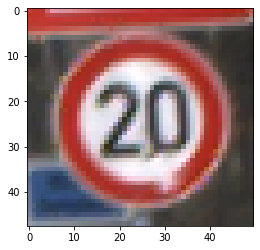

In [22]:
photo = np.asarray(trainImages[18])
plt.imshow(photo)

image after transformation

(30, 30, 3)


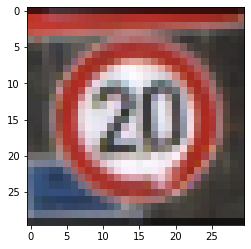

In [23]:
photo = Transform_image(trainImages[18])
plt.imshow(photo)
print(photo.shape)

In [59]:
for image in trainImages:
    image = Transform_image(image)

## split the data
we have data for train and data for test so we can use them without spliting 



In [8]:
#Shuffle our data
random.shuffle(images)
#Spliting our data
train_set = images[ :int(len(images)*0.8)]
test_set = images[int(len(images)*0.8): ]
train_set_np = np.asarray(train_set)

## Data augmentation 

In [9]:
#In the Report you should justify your choice and provide examples of augmentation (original vs augmented images).
#NB! The number of images of each class should be the same after the augmenation.

(-1, 43)

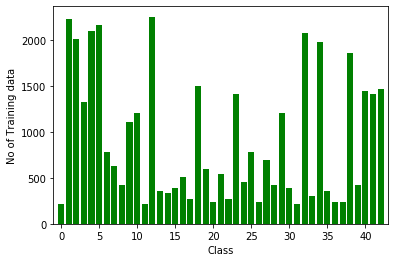

In [10]:
#draw the data distribution before augmentation
unique_elements, counts_elements = np.unique(trainLabels, return_counts = True)
plt.bar( np.arange( 43 ), counts_elements, align='center',color='green' )
plt.xlabel('Class')
plt.ylabel('No of Training data')
plt.xlim([-1, 43])

In [11]:
len(unique_elements)

43

the function takes an image and apply rotation by 10 degrees also translation

In [34]:
#data augment
def data_augment(image):
    rows= image.shape[0]
    cols = image.shape[1]
    
    # rotation
    M_rot = cv.getRotationMatrix2D((cols/2,rows/2),10,1)
    
    # Translation
    M_trans = np.float32([[1,0,3],[0,1,6]])
    
    
    img = cv.warpAffine(image,M_rot,(cols,rows))
    img = cv.warpAffine(img,M_trans,(cols,rows))
    #img = cv2.warpAffine(img,M_aff,(cols,rows))
    
    # Bilateral filtering
    img = cv.bilateralFilter(img,9,75,75)
    return img

In [35]:
#augmenttaion
classes = 43

trainImages = np.asarray(trainImages)
trainLabels = np.asarray(trainLabels, dtype=np.int)

X_train_final = trainImages
y_train_final = trainLabels
X_aug_1 = []
Y_aug_1 = []


for i in range(0,43):
    
    class_records = np.asarray(np.where(trainLabels==i)).size
    max_records = 2500
    if class_records != max_records:
        ovr_sample = max_records - class_records
        samples = trainImages[np.where(trainLabels==i)[0]]
        X_aug = []
        Y_aug = [i] * ovr_sample
        
        for x in range(ovr_sample):
            img = samples[x % class_records]
            trans_img = data_augment(img)
            X_aug.append(trans_img)
            
        X_train_final = np.concatenate((X_train_final, X_aug), axis=0)
        y_train_final = np.concatenate((y_train_final, Y_aug)) 
        
        Y_aug_1 = Y_aug_1 + Y_aug
        X_aug_1 = X_aug_1 + X_aug


### print data after augmentation

<BarContainer object of 43 artists>

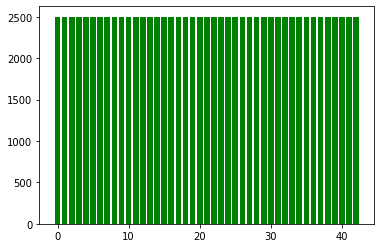

In [38]:
unique_elements, counts_elements = np.unique(y_train_final, return_counts = True)
plt.bar( np.arange( 43 ), counts_elements, align='center',color='green' )

### data normalization


In [60]:
#the values of the pixels are between 0 and 255 
for image in X_train_final:
    image = image * 1/255


In [ ]:

train_dataset = DataLoader(X_train_final, batch_size=1, shuffle=False, sampler=None,

## Build Model

In [ ]:
#simple fc network not a convolution
from torch import nn
batch_size = 100

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(batch_size*30*30, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 43)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [ ]:
model = Network ()
model.forward(X_train_final)

### CNN Model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch. utils.data import DataLoader

class Net(nn.Module):#This defines the structure of the NN.def __init__(self):super(Net, self).__init__()
# These are all operations that we are defining.# Unlike keras, this is not the network definition.
# This is just initialization of the variables that 
# we are going to use in the `forward()` function.self.conv1 = nn.Conv2d(1, 10, kernel_size=5)self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 43)

    def forward(self, x):
#         print("1", x.shape)
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
#         print("2", x.shape)
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
#         print("3", x.shape)
        x = x.view(-1, 320)
#         print("4", x.shape)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model_cnn = Net().to(device)

### FC model

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 100)
        self.fc4 = nn.Linear(100, 10)
        # reducing number of params to match that of CNN
#         self.fc1 = nn.Linear(28*28, 20)
#         self.fc2 = nn.Linear(20, 100)
#         self.fc3 = nn.Linear(100, 40)
#         self.fc4 = nn.Linear(40, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
    
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model_nn = Net().to(device)

## References
Padding and resizing: 
https://stackoverflow.com/questions/35196424/re-sizing-a-rectangular-image-to-a-square-image?rq=1

https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html
split dataset: https://medium.com/@contactsunny/how-to-split-your-dataset-to-train-and-test-datasets-using-scikit-learn-e7cf6eb5e0d